In [43]:
import requests
import pandas as pd 

In [5]:
# URL of the website
url = 'https://api.depin.ninja/graphql'

In [9]:
# The GraphQL query. This will need to be adjusted to match the exact query the webpage is using.
# You can usually find this in the 'Payload' tab of the network request in your browser's developer tools.
query = """
{
  allProjects {
    edges {
      node {
        id
        name
        category
        chain
        marketCap
        token
        description
        iconUrl
      }
    }
  }
}
"""

# Perform the POST request
response = requests.post(url, json={'query': query})

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON response
    json_data = response.json()
    
    # Extract the projects data from the JSON response
    projects_data = [edge['node'] for edge in json_data['data']['allProjects']['edges']]
    
    # Create a DataFrame
    projects_df = pd.DataFrame(projects_data)
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}, Response: {response.text}")

projects_df.head(20)


,id,name,category,chain,marketCap,token,description,iconUrl
0,UHJvamVjdDowYTR2bm4=,inheritance Art,AI,ETHEREUM,277846.0,IAI,Inheritance Art aims to be the largest NFT/AI-...,None
1,UHJvamVjdDowYnZzeHQ=,Humcen,NOT_DEPIN,None,NaN,None,Humcen is the world’s first cross border IP ag...,None
2,UHJvamVjdDowZHB6bTQ=,Livepeer,COMPUTE,ETHEREUM,204637172.0,LPT,Livepeer is a decentralized network for video ...,None
3,UHJvamVjdDowZTllaDM=,Upfire,COMPUTE,ETHEREUM,337072.0,UPR,Upfire is a decentralized protocol for secure ...,None
4,UHJvamVjdDowZXpuZ3Q=,MASQ,COMPUTE,ETHEREUM,11402172.0,MASQ,MASQ is a decentralized VPN network built on P...,None
5,UHJvamVjdDowZmk5cTA=,SolRazr,NOT_DEPIN,SOLANA,2405536.0,SOLR,SolRazr is a decentralized developer ecosystem...,None
6,UHJvamVjdDowZzVpZ3I=,Coco Swap,NOT_DEPIN,None,NaN,None,Coco Swap: Faster and easier token swaps with ...,None
7,UHJvamVjdDowaWYxaHM=,Entheos,ENERGY,None,NaN,None,Entheos Network: energy solutions & batteries ...,None
8,UHJvamVjdDowazhncTQ=,Photon,COMPUTE,None,NaN,None,Photon is a decentralized storage protocol for...,None
9,UHJvamVjdDowazkzcmM=,Superchain,NOT_DEPIN,None,NaN,None,"Developer of Open Index Protocol, an efficient...",None


In [12]:
# Remove the "id" and "iconUrl" columns
projects_df.drop(columns=['id', 'iconUrl'], errors='ignore', inplace=True)

# Remove any row where the value in the category column is "NOT_DEPIN"
projects_df = projects_df[projects_df['category'] != 'NOT_DEPIN']

# Display the first few rows of the DataFrame to verify changes
projects_df.head(50)

,name,category,chain,marketCap,token,description
0,inheritance Art,AI,ETHEREUM,277846.0,IAI,Inheritance Art aims to be the largest NFT/AI-...
2,Livepeer,COMPUTE,ETHEREUM,204637172.0,LPT,Livepeer is a decentralized network for video ...
3,Upfire,COMPUTE,ETHEREUM,337072.0,UPR,Upfire is a decentralized protocol for secure ...
4,MASQ,COMPUTE,ETHEREUM,11402172.0,MASQ,MASQ is a decentralized VPN network built on P...
7,Entheos,ENERGY,None,NaN,None,Entheos Network: energy solutions & batteries ...
8,Photon,COMPUTE,None,NaN,None,Photon is a decentralized storage protocol for...
10,EpiK,AI,ETHEREUM,860881.0,AIEPK,"EpiK Protocol: Using IPFS, DAO and token econo..."
12,LocalPro,OTHER,None,NaN,None,"LocalPro: gamifies experiences, promotes trust..."
13,Flux,COMPUTE,ETHEREUM,127823657.0,FLUX,Flux is a decentralized compute network for cr...
14,4everland,COMPUTE,None,NaN,None,4everland is a decentralized cloud provider in...


In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

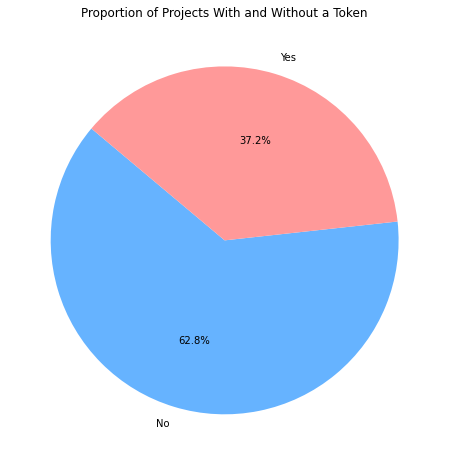

In [100]:
# Create a new 'Has Token' column that checks for 'None' or NaN values
projects_df['Has Token'] = projects_df['token'].apply(lambda x: 'No' if pd.isna(x) or x == 'None' else 'Yes')

# Count the number of projects with and without a token
token_counts = projects_df['Has Token'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(token_counts, labels=token_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#ff9999'])
plt.title('Proportion of Projects With and Without a Token')

# Save the figure
# Save the figure to your local machine
plt.savefig('/Users/mitchelschneider/Desktop/DataAnalysis/DePin/depin_token_distribution_pie_chart.png', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()

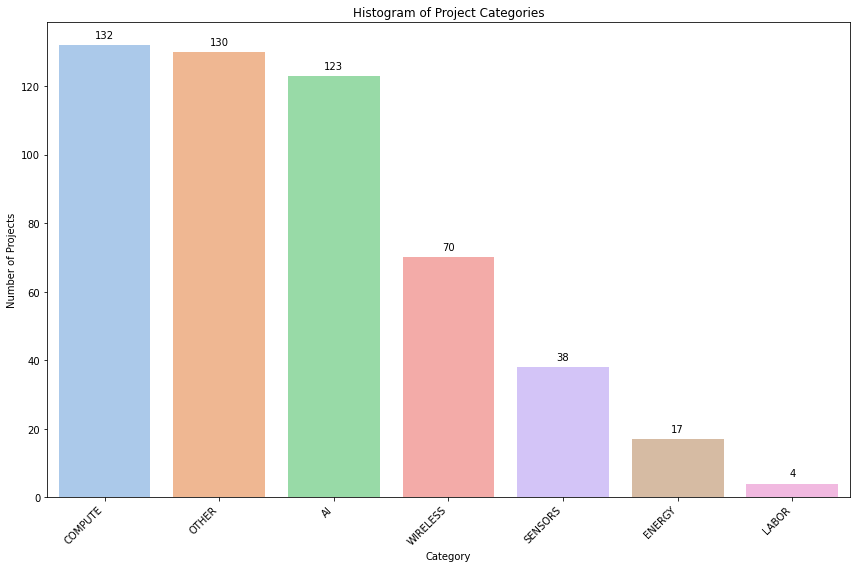

In [101]:
# Create a histogram of the project categories
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=projects_df, x='category', palette='pastel', order=projects_df['category'].value_counts().index)

plt.title('Histogram of Project Categories')
plt.xlabel('Category')
plt.ylabel('Number of Projects')
plt.xticks(rotation=45, ha='right')  # Rotate the x labels to fit and avoid overlapping

# Annotate each bar with the number of projects
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points')

plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping

plt.savefig('/Users/mitchelschneider/Desktop/DataAnalysis/DePin/depin_histogram_project_categories.png', bbox_inches='tight', dpi=300)


plt.show()  # Show the plot


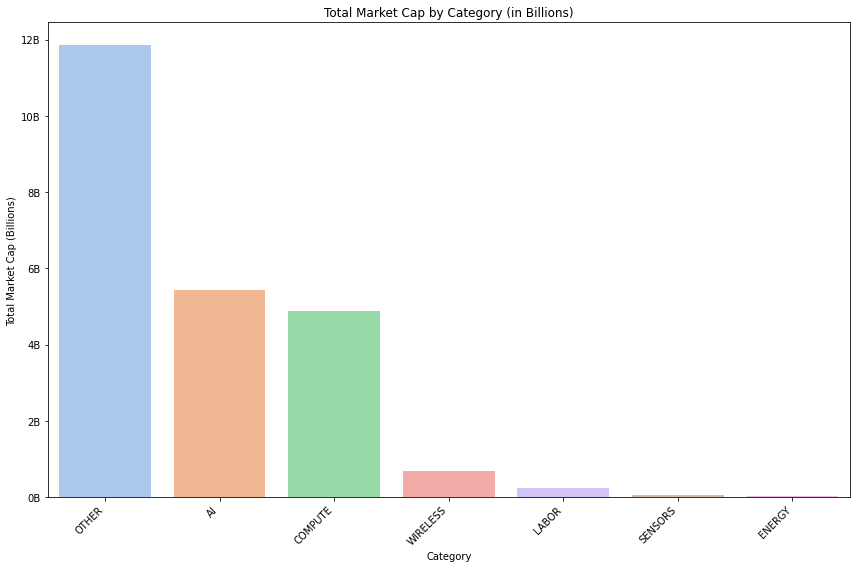

In [102]:
import matplotlib.ticker as mtick

# Aggregate market cap by category and convert to billions
market_cap_by_category = projects_df.groupby('category')['marketCap'].sum() / 1e9

# Sort the series for better visualization
market_cap_by_category_sorted = market_cap_by_category.sort_values(ascending=False)

# Create the bar chart
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=market_cap_by_category_sorted.index, y=market_cap_by_category_sorted.values, palette='pastel')

# Format the y-axis to show values in billions with a 'B' suffix and without decimal points
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x)}B'))

# Set the title and labels
plt.title('Total Market Cap by Category (in Billions)')
plt.xlabel('Category')
plt.ylabel('Total Market Cap (Billions)')
plt.xticks(rotation=45, ha='right')

plt.savefig('/Users/mitchelschneider/Desktop/DataAnalysis/DePin/depin_barchart_project_categories_mktcap.png', bbox_inches='tight', dpi=300)


# Show the plot
plt.tight_layout()
plt.show()


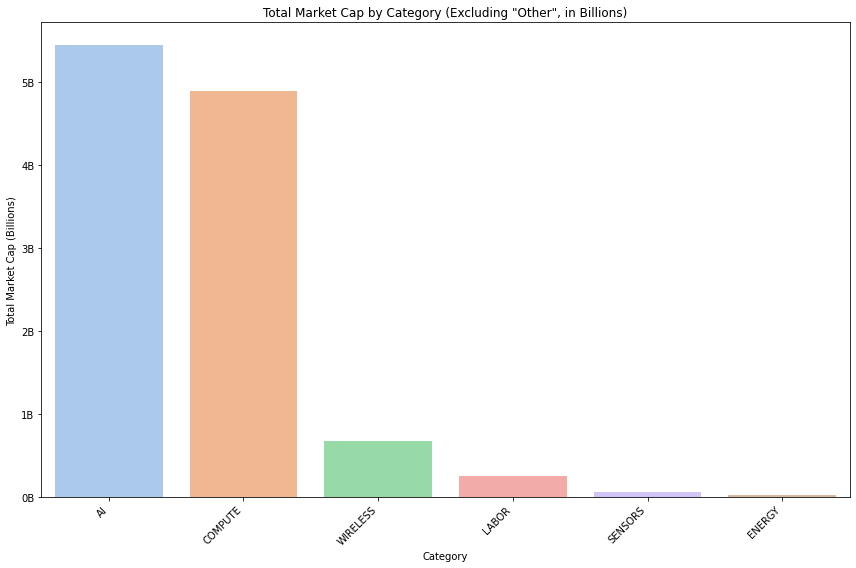

In [103]:
# Filter out rows where the category is 'Other'
filtered_df = projects_df[projects_df['category'] != 'OTHER']

# Aggregate market cap by category and convert to billions in the filtered DataFrame
market_cap_by_category = filtered_df.groupby('category')['marketCap'].sum() / 1e9

# Sort the series for better visualization
market_cap_by_category_sorted = market_cap_by_category.sort_values(ascending=False)

# Create the bar chart using the filtered DataFrame
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=market_cap_by_category_sorted.index, y=market_cap_by_category_sorted.values, palette='pastel')

# Format the y-axis to show values in billions with a 'B' suffix and without decimal points
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x)}B'))

# Set the title and labels
plt.title('Total Market Cap by Category (Excluding "Other", in Billions)')
plt.xlabel('Category')
plt.ylabel('Total Market Cap (Billions)')
plt.xticks(rotation=45, ha='right')

plt.savefig('/Users/mitchelschneider/Desktop/DataAnalysis/DePin/depin_barchart_project_categories_mktcap_exclOther.png', bbox_inches='tight', dpi=300)


# Show the plot
plt.tight_layout()
plt.show()

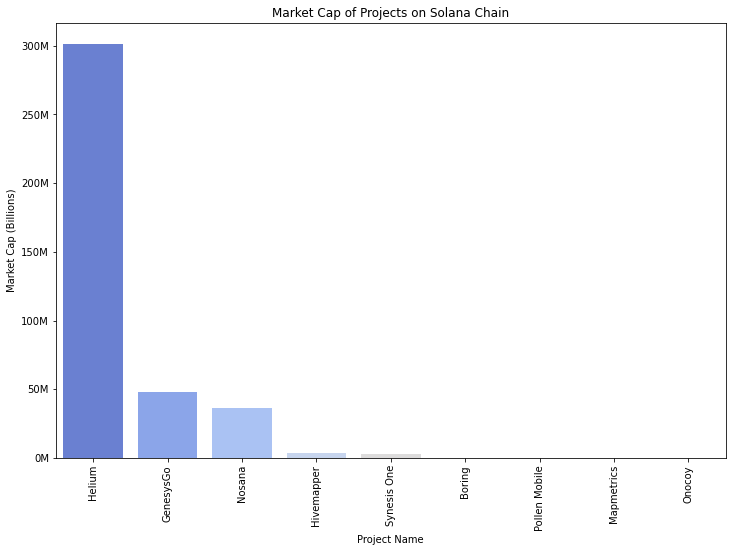

In [104]:
# Filter the DataFrame for projects on the 'Solana' chain
solana_projects = projects_df[projects_df['chain'] == 'SOLANA']

# Sort the projects by market cap for better visualization
solana_projects_sorted = solana_projects.sort_values(by='marketCap', ascending=False)

# Create the bar chart
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=solana_projects_sorted, x='name', y='marketCap', palette='coolwarm')

# Format the y-axis to show market cap values in millions
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x / 1e6)}M'))

# Set the title and labels
plt.title('Market Cap of Projects on Solana Chain')
plt.xlabel('Project Name')
plt.ylabel('Market Cap (Billions)')
plt.xticks(rotation=90)  # Rotate x labels for better readability

plt.savefig('/Users/mitchelschneider/Desktop/DataAnalysis/DePin/depin_barchart_project_categories_mktcap_solana.png', bbox_inches='tight', dpi=300)


# Show the plot
plt.show()

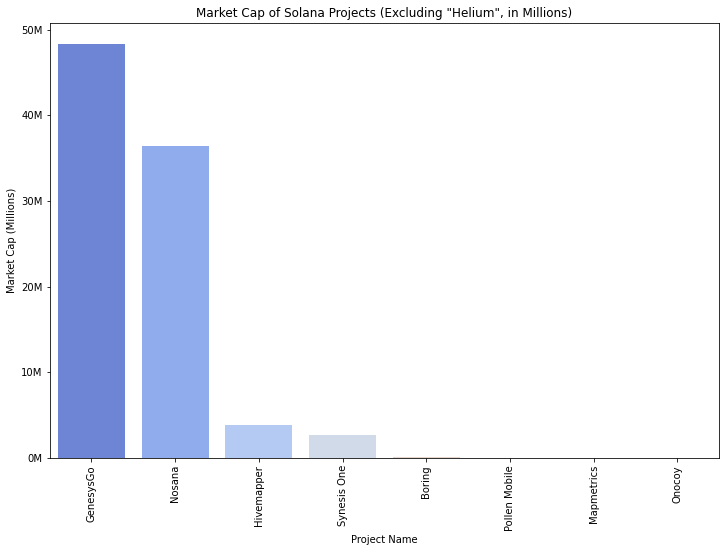

In [105]:
# Filter the DataFrame for projects on the 'Solana' chain, excluding 'Helium'
solana_projects_excluding_helium = projects_df[(projects_df['chain'] == 'SOLANA') & (projects_df['name'] != 'Helium')]

# Sort the projects by market cap for better visualization
solana_projects_sorted = solana_projects_excluding_helium.sort_values(by='marketCap', ascending=False)

# Create the bar chart
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=solana_projects_sorted, x='name', y='marketCap', palette='coolwarm')

# Format the y-axis to show market cap values in millions
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x / 1e6)}M'))

# Set the title and labels
plt.title('Market Cap of Solana Projects (Excluding "Helium", in Millions)')
plt.xlabel('Project Name')
plt.ylabel('Market Cap (Millions)')
plt.xticks(rotation=90)  # Rotate x labels for better readability

plt.savefig('/Users/mitchelschneider/Desktop/DataAnalysis/DePin/depin_barchart_project_categories_mktcap_sol_exclHelium.png', bbox_inches='tight', dpi=300)


# Show the plot
plt.show()

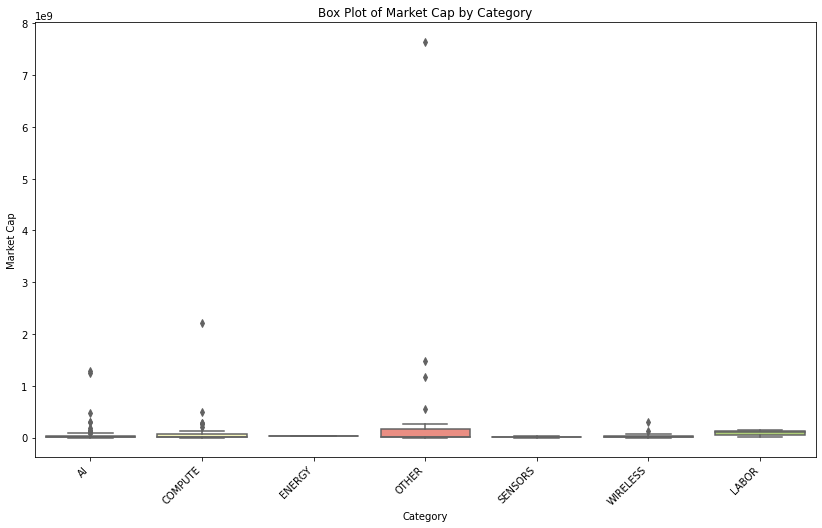

Outliers saved to: /Users/mitchelschneider/Desktop/DataAnalysis/DePin/depin_outliers.csv


,name,category,chain,marketCap,token,description,Has Token,Token Status,token_analysis,Token_Analysis
2,Livepeer,COMPUTE,ETHEREUM,2.046372e+08,LPT,Livepeer is a decentralized network for video ...,Yes,Has Token,Yes,1
17,Arweave,COMPUTE,NATIVE,5.007221e+08,AR,Arweave is a permanent and decentralized web i...,Yes,Has Token,Yes,1
72,Helium,WIRELESS,SOLANA,3.013659e+08,HNT,Helium is a decentralized network for IoT.,Yes,Has Token,Yes,1
84,Autonolas,AI,ETHEREUM,9.301199e+07,OLAS,Autonolas is a decentralized network of autono...,Yes,Has Token,Yes,1
111,Quant,OTHER,ETHEREUM,1.475853e+09,QNT,Quant is a blockchain project aiming to improv...,Yes,Has Token,Yes,1
119,IQ,AI,ETHEREUM,1.000280e+08,IQ,IQ: AI and blockchain firm with applications l...,Yes,Has Token,Yes,1
160,SingularityNET,AI,ETHEREUM,3.020904e+08,AGIX,"SingularityNET enables easy creation, sharing,...",Yes,Has Token,Yes,1
234,Theta Fuel,COMPUTE,NATIVE,2.834579e+08,TFUEL,Theta Fuel is a decentralized video delivery n...,Yes,Has Token,Yes,1
272,Render,AI,ETHEREUM,1.277175e+09,RNDR,Render is a decentralized rendering platform f...,Yes,Has Token,Yes,1
284,Sia,COMPUTE,NATIVE,2.673349e+08,SC,Sia is a decentralized cloud storage network c...,Yes,Has Token,Yes,1


In [106]:
# Create a box plot to identify outliers in market cap within each category
plt.figure(figsize=(14, 8))
sns.boxplot(x='category', y='marketCap', data=projects_df, palette='Set3')

plt.title('Box Plot of Market Cap by Category')
plt.xlabel('Category')
plt.ylabel('Market Cap')
plt.xticks(rotation=45, ha='right')  # Rotate the x labels for better readability

# Show the plot
plt.show()

# Identifying outliers
# For simplicity, let's define outliers as projects whose market cap is beyond 1.5 IQR from the quartiles.
Q1 = projects_df.groupby('category')['marketCap'].quantile(0.25)
Q3 = projects_df.groupby('category')['marketCap'].quantile(0.75)
IQR = Q3 - Q1

outliers = projects_df[projects_df.apply(lambda x: (x['marketCap'] > (Q3[x['category']] + 1.5 * IQR[x['category']])) or
                                             (x['marketCap'] < (Q1[x['category']] - 1.5 * IQR[x['category']]))
                                             , axis=1)]

file_path = '/Users/mitchelschneider/Desktop/DataAnalysis/DePin/depin_outliers.csv'
outliers.to_csv(file_path, index=False)

print("Outliers saved to:", file_path)

# Displaying some of the outlier projects
outliers

In [59]:
import matplotlib.pyplot as plt

# Assuming 'projects_df' is your DataFrame containing the project data.

# Create a column to indicate whether a project has a token (1) or not (0)
projects_df['Has Token'] = projects_df['token'].apply(lambda x: 'Has Token' if x != 'None' else 'No Token')

# Count the number of projects with and without a token
token_counts = projects_df['Has Token'].value_counts()

# Check the counts
print(token_counts)

# Assuming the counts are correct and we have both categories, create the pie chart
if len(token_counts) > 1:
    plt.figure(figsize=(8, 8))
    plt.pie(token_counts, labels=token_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title('Proportion of Projects With and Without a Token')
    plt.show()
else:
    print("The dataset does not contain varied token data, or the 'Has Token' column was not created correctly.")


Has Token    514
Name: Has Token, dtype: int64
The dataset does not contain varied token data, or the 'Has Token' column was not created correctly.


In [79]:
projects_df.head()

,name,category,chain,marketCap,token,description,Has Token,Token Status,token_analysis,Token_Analysis
0,inheritance Art,AI,ETHEREUM,277846.0,IAI,Inheritance Art aims to be the largest NFT/AI-...,Yes,Has Token,Yes,1
2,Livepeer,COMPUTE,ETHEREUM,204637172.0,LPT,Livepeer is a decentralized network for video ...,Yes,Has Token,Yes,1
3,Upfire,COMPUTE,ETHEREUM,337072.0,UPR,Upfire is a decentralized protocol for secure ...,Yes,Has Token,Yes,1
4,MASQ,COMPUTE,ETHEREUM,11402172.0,MASQ,MASQ is a decentralized VPN network built on P...,Yes,Has Token,Yes,1
7,Entheos,ENERGY,None,NaN,None,Entheos Network: energy solutions & batteries ...,No,Has Token,Yes,1


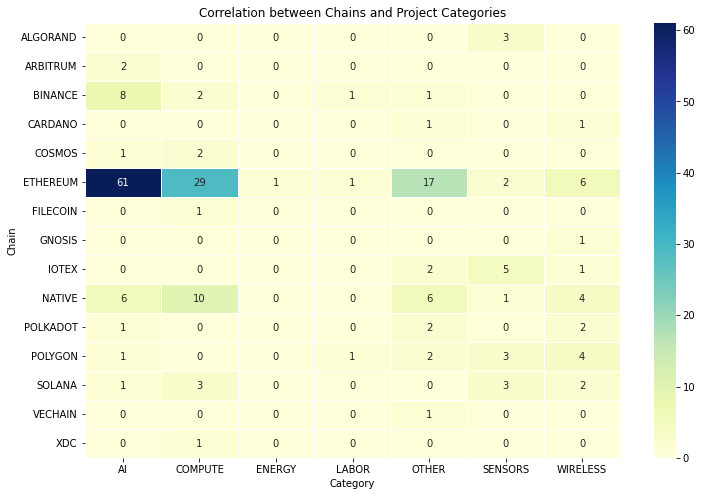

In [107]:
# Create a cross-tabulation of chains and categories
chain_category_crosstab = pd.crosstab(projects_df['chain'], projects_df['category'])

# Generate a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(chain_category_crosstab, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5)

# Add titles and labels
plt.title('Correlation between Chains and Project Categories')
plt.xlabel('Category')
plt.ylabel('Chain')

plt.savefig('/Users/mitchelschneider/Desktop/DataAnalysis/DePin/depin_heatmap_chains_categories.png', bbox_inches='tight', dpi=300)


# Show the plot
plt.show()